In [ ]:
from helpers.preparation_helpers import  get_over_z_score_index
import pandas as pd
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [271]:
df =pd.read_csv("data/original/bank+marketing/bank-additional/bank-additional/bank-additional-full.csv",sep=";",na_values="unknown")

In [272]:
categorical_columns=["job","marital","education","default","housing","loan","contact","day_of_week","month","poutcome","previous"]

numerical_columns = ["age","duration","campaign","pdays"]


In [273]:
df.drop(columns=["emp.var.rate","cons.price.idx","euribor3m","nr.employed","cons.conf.idx"],inplace=True)

# DATA PREPARATION

## REMOVING COLUMNS

In [274]:
df.drop(columns=["default","poutcome"],inplace=True)
categorical_columns.remove("default")
categorical_columns.remove("poutcome")

## REMOVING MISSING VALUES

In [275]:
df.dropna(inplace=True)

## REPLACING OUTLIERS

### AGE

In [276]:
age_index_del = get_over_z_score_index(df,"age")
df.loc[age_index_del,["age"]] = df.age.mean()

C:\Users\alekw\AppData\Local\Temp\ipykernel_27488\2040953795.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '39.86087070205256' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[age_index_del,["age"]] = df.age.mean()


### DURATION

In [277]:
age_index_del = get_over_z_score_index(df,"duration")
df.loc[age_index_del,["duration"]] = df.duration.mean()

C:\Users\alekw\AppData\Local\Temp\ipykernel_27488\146539182.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '258.2075826905478' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[age_index_del,["duration"]] = df.duration.mean()


### CAMPAIGN

In [278]:
campaign_index_del = get_over_z_score_index(df,"campaign")
df.loc[age_index_del,["campaign"]] = df.campaign.mean()

C:\Users\alekw\AppData\Local\Temp\ipykernel_27488\2163055025.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5666623087985356' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[age_index_del,["campaign"]] = df.campaign.mean()


### EDUCATION

In [279]:
df[df["education"]=="illiterate"].index
df.drop(df[df["education"]=="illiterate"].index,inplace=True)

## MODIFICATION OF EXISTING COLUMNS

### PDAYS

In [280]:
df["pdays"] = df["pdays"].map(lambda pday: 1 if pday == 999 else 0 )

## STANDARDIZATION OF NUMERICAL FEATURES

In [281]:
from sklearn.preprocessing import StandardScaler
object = StandardScaler()
df2 = df.copy()
df2[numerical_columns] = object.fit_transform(df[numerical_columns])
df2

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,y
0,1.723919,housemaid,married,basic.4y,no,no,telephone,may,mon,0.139127,-0.569995,0.192432,0,no
1,1.828357,services,married,high.school,no,no,telephone,may,mon,-0.450485,-0.569995,0.192432,0,no
2,-0.260405,services,married,high.school,yes,no,telephone,may,mon,-0.045127,-0.569995,0.192432,0,no
3,0.052909,admin.,married,basic.6y,no,no,telephone,may,mon,-0.439956,-0.569995,0.192432,0,no
4,1.723919,services,married,high.school,no,yes,telephone,may,mon,0.381289,-0.569995,0.192432,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.038379,retired,married,professional.course,yes,no,cellular,nov,fri,0.523428,-0.569995,0.192432,0,yes
41184,0.679538,blue-collar,married,professional.course,no,no,cellular,nov,fri,0.781384,-0.569995,0.192432,0,no
41185,1.723919,retired,married,university.degree,yes,no,cellular,nov,fri,-0.239909,-0.205931,0.192432,0,no
41186,0.470662,technician,married,professional.course,no,no,cellular,nov,fri,1.091983,-0.569995,0.192432,0,yes


## ONE HOT ENCODING CATEGORICAL FEATURES

In [282]:
from sklearn.preprocessing import OneHotEncoder 
df2.reset_index(inplace=True)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(df2[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))


df_encoded=pd.concat([df2.drop(categorical_columns,axis=1),one_hot_df],axis=1)

df_encoded.drop(columns="index",inplace=True)

In [283]:
df_encoded.head()

,age,duration,campaign,pdays,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_oct,month_sep,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7
0,1.723919,0.139127,-0.569995,0.192432,no,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.828357,-0.450485,-0.569995,0.192432,no,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.260405,-0.045127,-0.569995,0.192432,no,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.052909,-0.439956,-0.569995,0.192432,no,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.723919,0.381289,-0.569995,0.192432,no,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## FEATURES CORRELATION STUDY

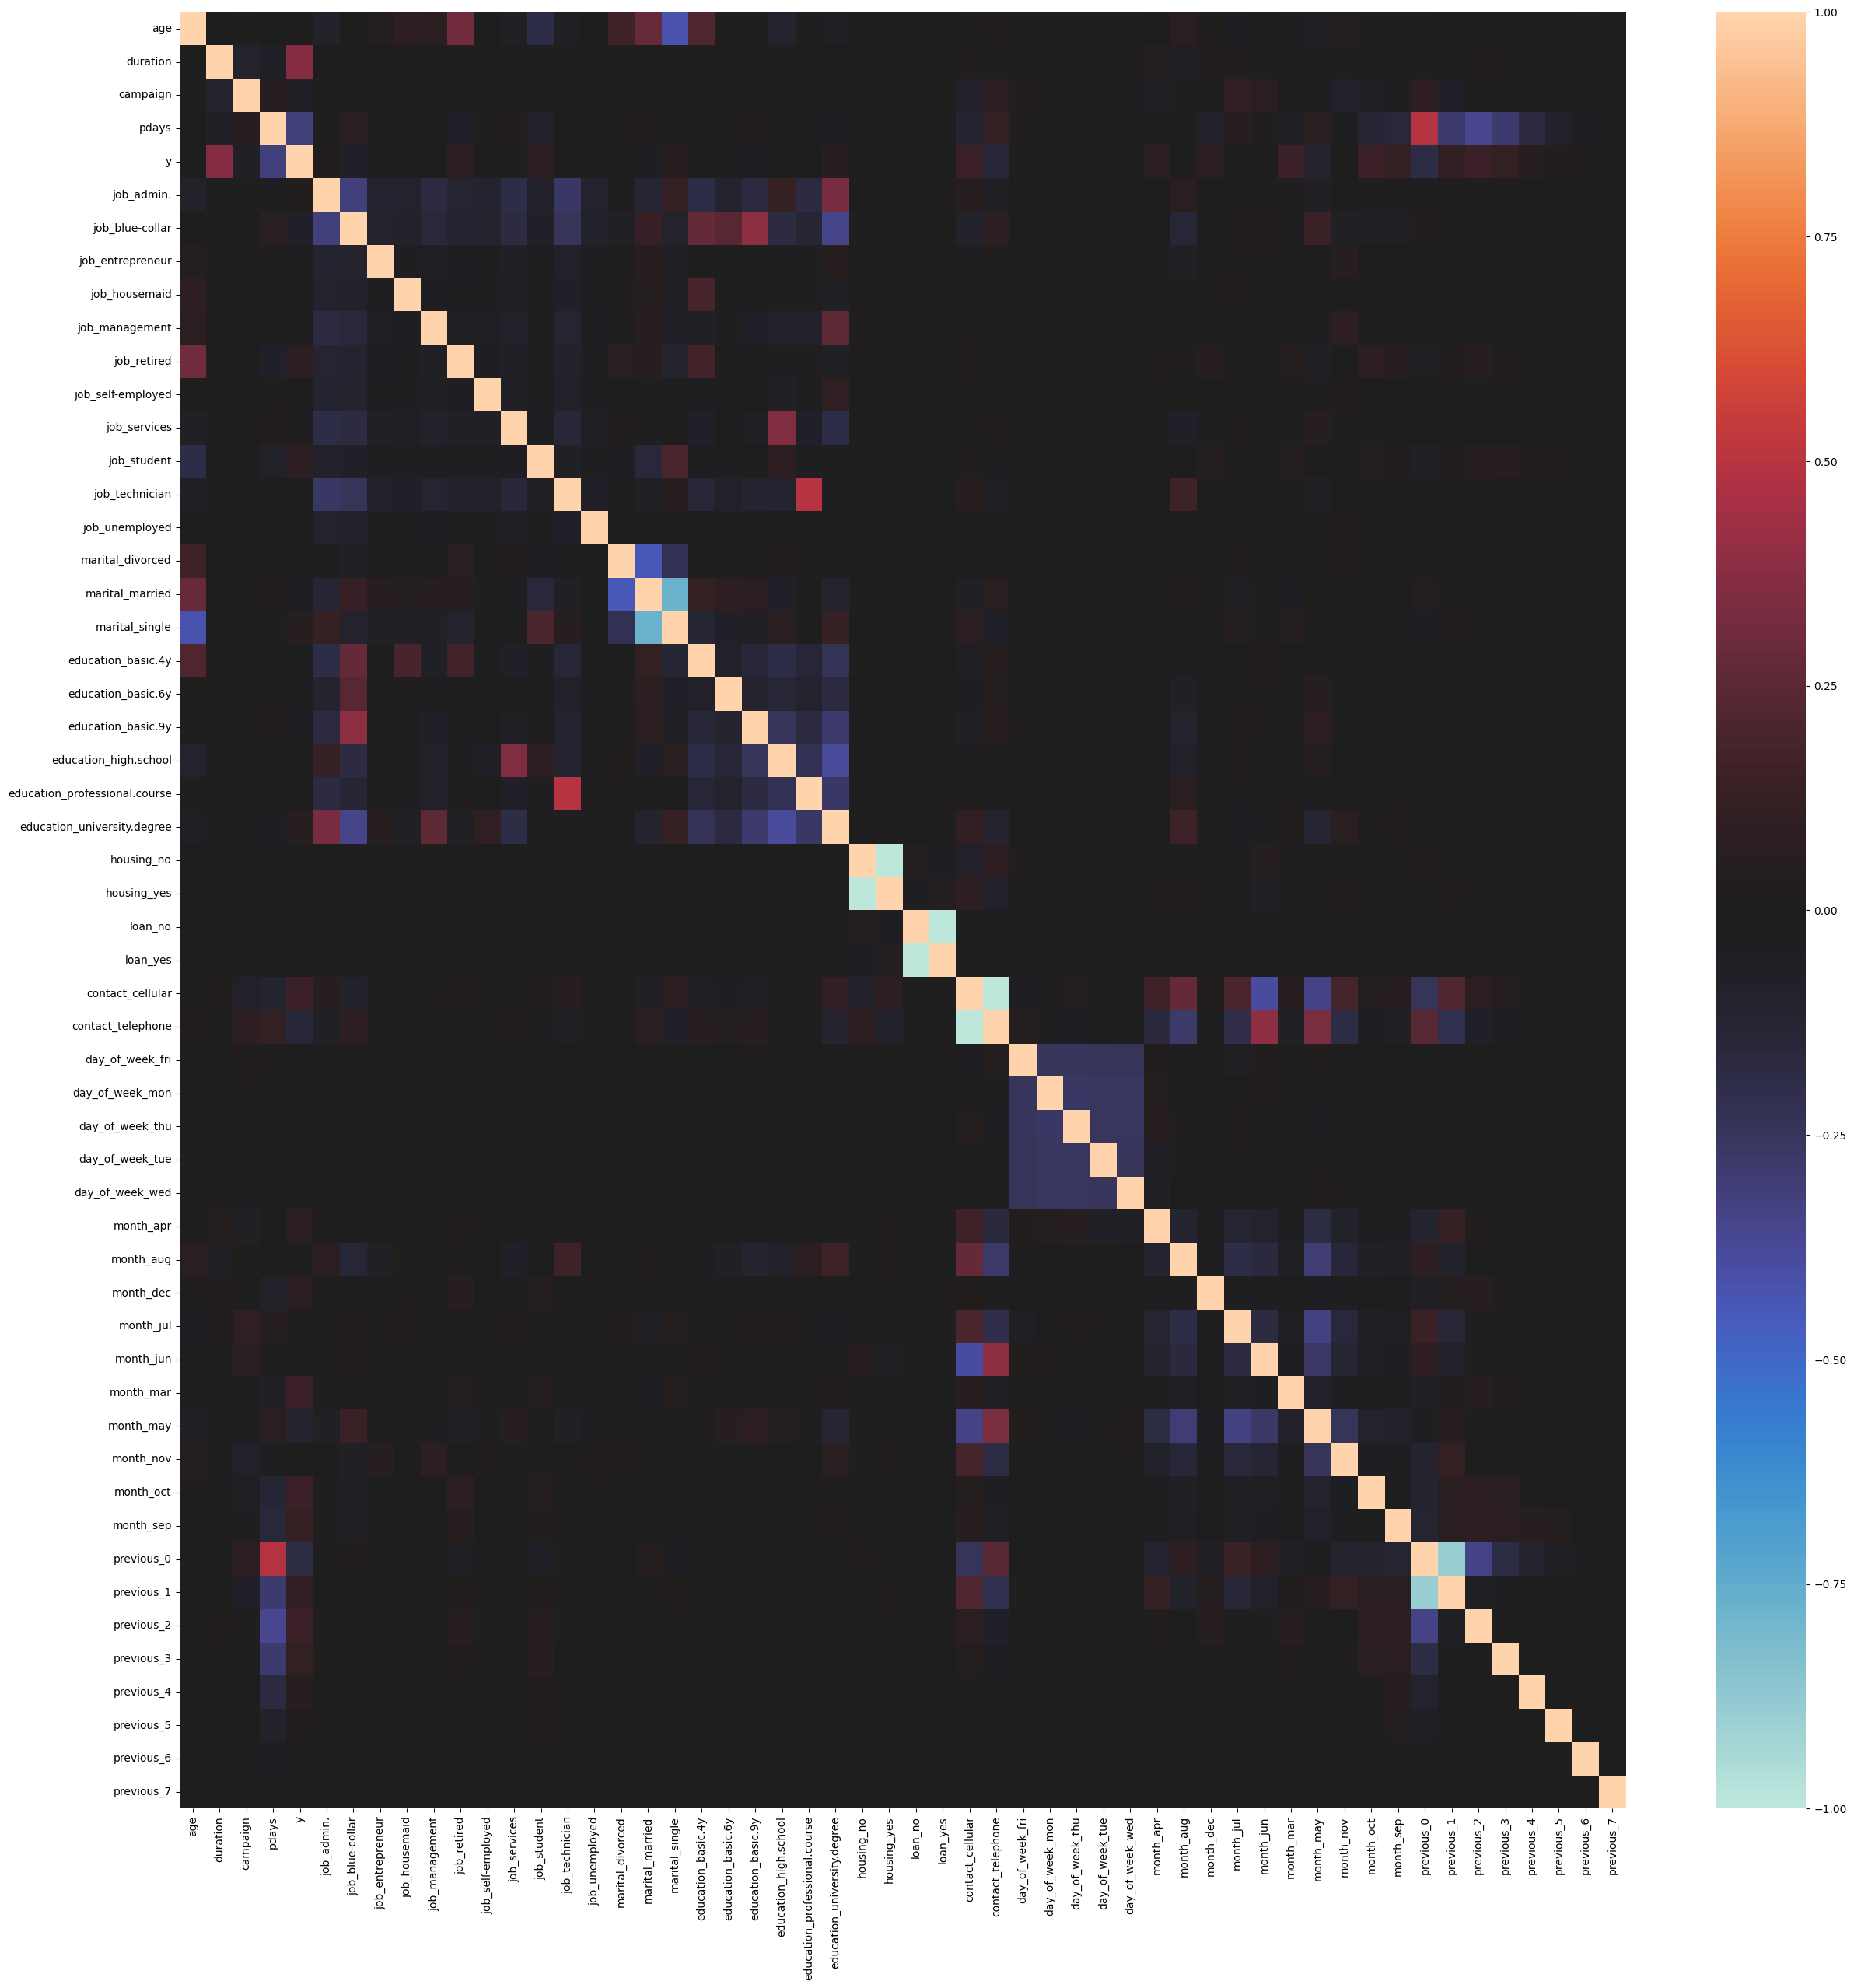

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))

df_corr=df_encoded.copy()

df_corr.y=df_corr.y.map(lambda x: 1 if x == "yes" else 0)

heatmap = sns.heatmap(df_corr.corr(), center=0.0,ax=ax,vmax=1,vmin=-1)


In [285]:
df_encoded.drop(columns=["housing_no","loan_no","contact_cellular","marital_single","previous_0"],inplace=True)###


In [286]:
df_encoded

,age,duration,campaign,pdays,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_nov,month_oct,month_sep,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7
0,1.723919,0.139127,-0.569995,0.192432,no,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.828357,-0.450485,-0.569995,0.192432,no,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.260405,-0.045127,-0.569995,0.192432,no,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.052909,-0.439956,-0.569995,0.192432,no,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.723919,0.381289,-0.569995,0.192432,no,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38222,0.038379,0.523428,-0.569995,0.192432,yes,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38223,0.679538,0.781384,-0.569995,0.192432,no,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38224,1.723919,-0.239909,-0.205931,0.192432,no,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38225,0.470662,1.091983,-0.569995,0.192432,yes,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## OVERSAMPLING

In [287]:
df_encoded
X = df_encoded.drop(columns="y")
y = df_encoded.y
smote = SMOTE(random_state=0)
X,y = smote.fit_resample(X,y)

In [288]:
df_sampled=pd.concat([X,y],axis=1)

In [289]:
df_sampled["y"].value_counts()

y
no     33973
yes    33973
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

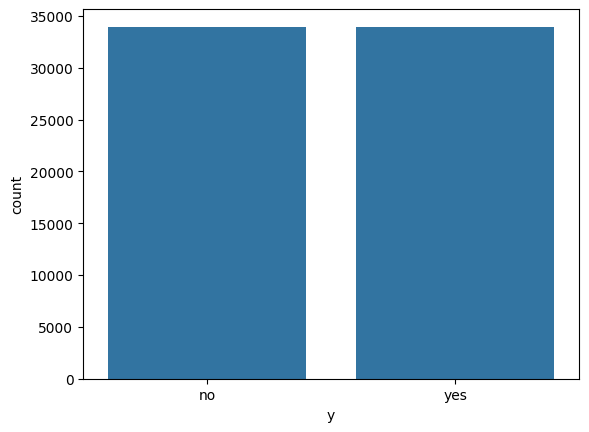

In [290]:
sns.countplot(data=df_sampled,x="y")

## SAVING TO CSV FILE

In [291]:
df_sampled.to_csv("data/clean/cleaned_data.csv",sep=";")


## PCA

Text(0.5, 0, 'PC3')

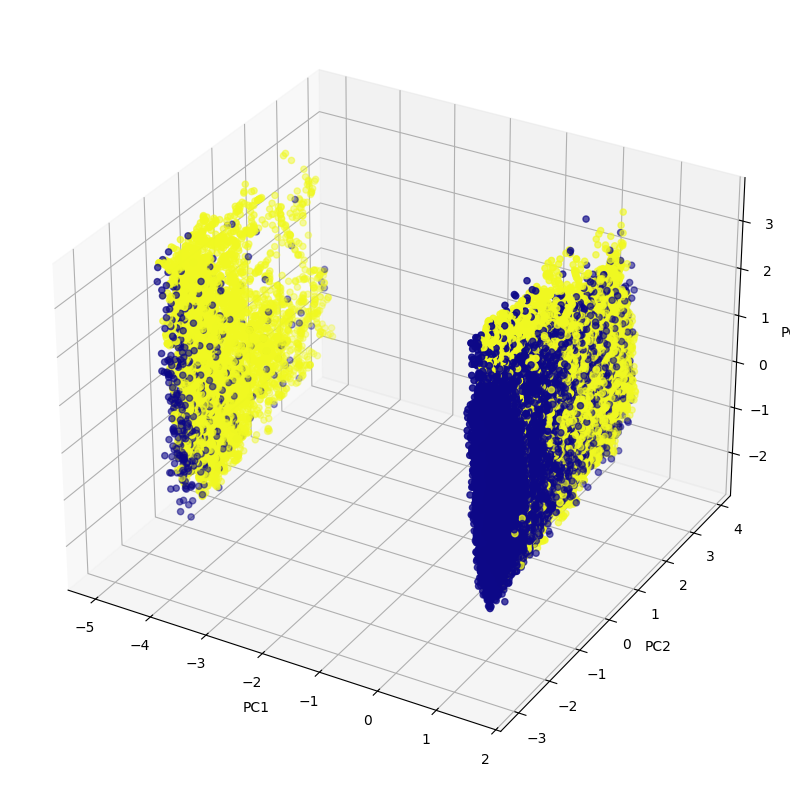

In [292]:
principal = PCA(n_components=3)
principal.fit(df_sampled.drop(columns=["y"]),df["y"])
x= principal.transform(df_sampled.drop(columns=["y"]))

y=df_sampled.y.map(lambda x: 1 if x =="yes" else 0)

fig = plt.figure(figsize=(10,10))
axis=fig.add_subplot(111,projection="3d")
axis.scatter(x[:,0],x[:,1],x[:,2],c=y,cmap='plasma')
axis.set_xlabel("PC1",fontsize=10)
axis.set_ylabel("PC2",fontsize=10)
axis.set_zlabel("PC3",fontsize=10)
